In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the dataset
data = pd.read_csv('twitter.csv', encoding='ISO-8859-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [5]:
class_distribution = data['target'].value_counts()
print(class_distribution)

0    800000
4    800000
Name: target, dtype: int64


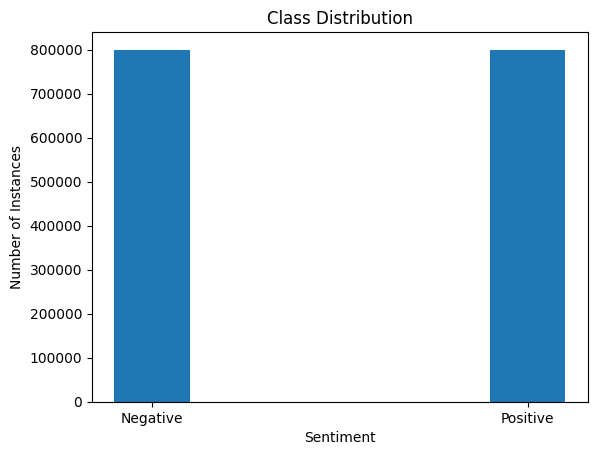

In [6]:
plt.bar(class_distribution.index, class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Instances')
plt.xticks(list(class_distribution.index), ['Negative', 'Positive'])  # Adjust if different classes
plt.show()

In [7]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [8]:
print("Number of duplicate records:", data.duplicated().sum())

Number of duplicate records: 0


In [9]:
data['tweet_length'] = data['text'].apply(len)

# Summary statistics
print(data['tweet_length'].describe())

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: tweet_length, dtype: float64


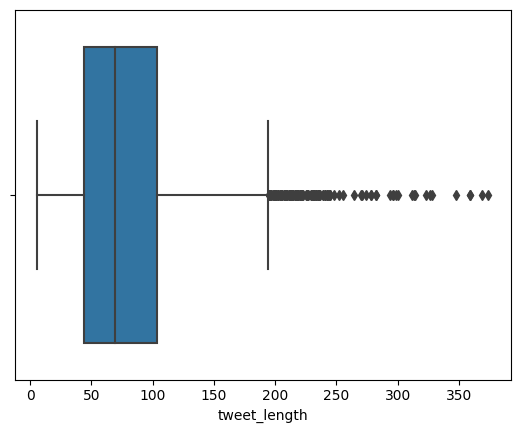

In [10]:
sns.boxplot(x=data['tweet_length'])
plt.show()


In [11]:
outliers = data[data['tweet_length'] > 280]
print("Number of Outliers:", len(outliers))

Number of Outliers: 18


count    1.600000e+06
mean     2.836250e-02
std      2.322000e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.800000e+01
Name: #_count, dtype: float64


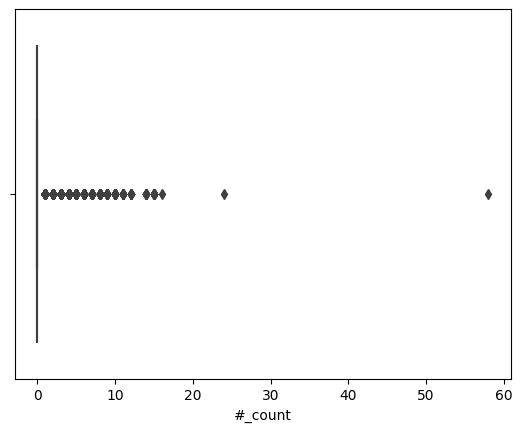

count    1.600000e+06
mean     4.991762e-01
std      5.935093e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.300000e+01
Name: @_count, dtype: float64


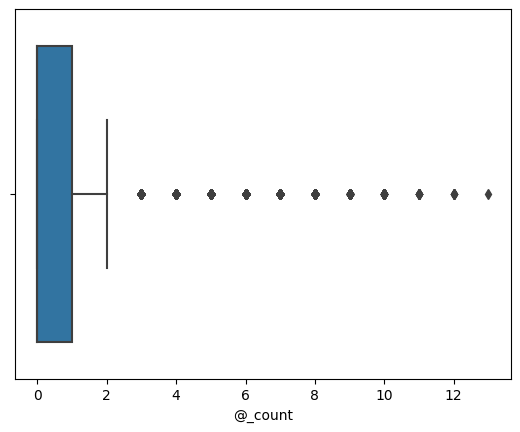

In [12]:
special_chars = ['#', '@']

for special_char in special_chars:
    data[f'{special_char}_count'] = data['text'].apply(lambda x: x.count(special_char))
    print(data[f'{special_char}_count'].describe())
    sns.boxplot(x=data[f'{special_char}_count'])
    plt.show()
    abnormal_post = data[data[f'{special_char}_count'] > 10]


In [13]:
print("Number of abnormal posts:", len(abnormal_post))

Number of abnormal posts: 16


In [14]:
data['text_length'] = data['text'].apply(len)

In [15]:
# Basic statistics of tweet text length
text_length_stats = data['text_length'].describe()
print(text_length_stats)

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


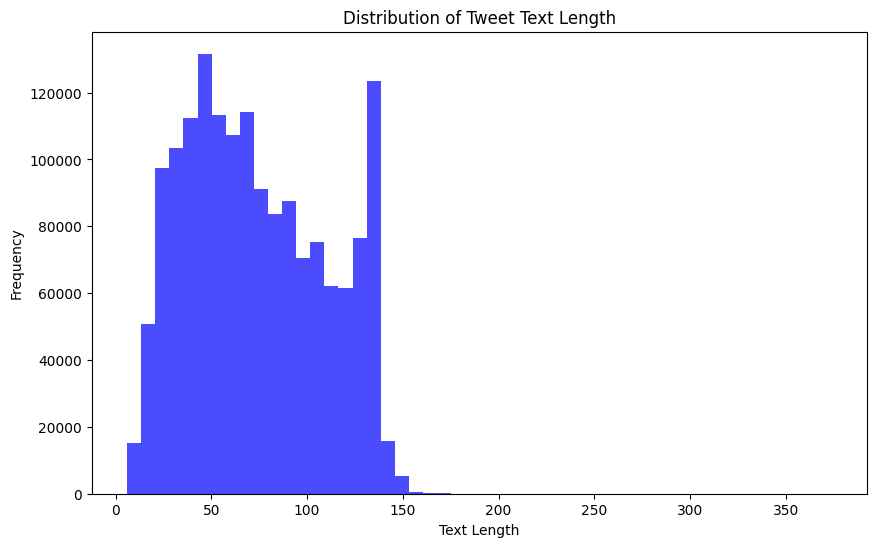

In [16]:
# Plotting the distribution of text lengths
plt.figure(figsize=(10,6))
plt.hist(data['text_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Tweet Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


<ipython-input-17-170b068db2b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['text_length'], hist = False, kde = True,
<ipython-input-17-170b068db2b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['text_length'], hist = False, kde = True,


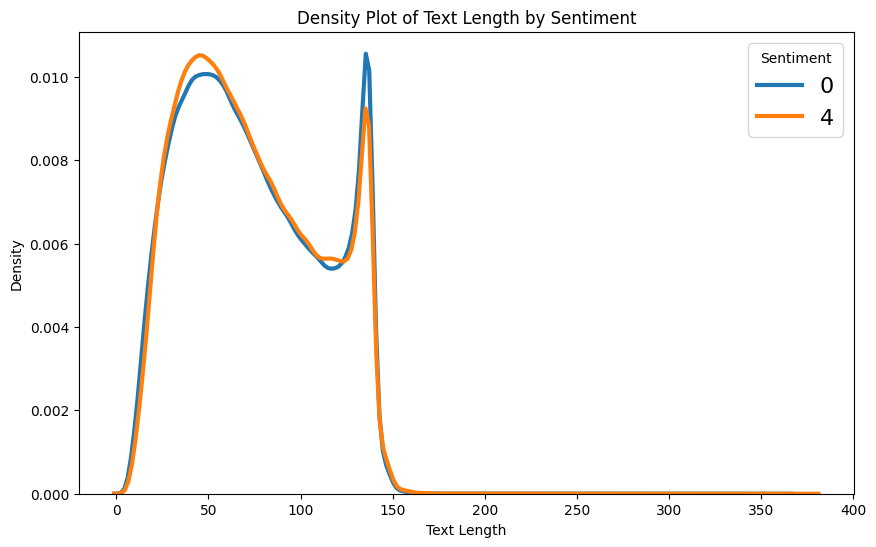

In [17]:
plt.figure(figsize=(10,6))
for label in [0, 4]:
    subset = data[data['target'] == label]
    sns.distplot(subset['text_length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = label)

plt.legend(prop={'size': 16}, title = 'Sentiment')
plt.title('Density Plot of Text Length by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()


In [18]:
grouped = data.groupby('target')['text_length'].describe()

print(grouped)


           count       mean        std  min   25%   50%    75%    max
target                                                               
0       800000.0  74.301790  36.743260  6.0  44.0  70.0  104.0  359.0
4       800000.0  73.878433  36.135274  6.0  44.0  69.0  103.0  374.0
